## **Loading Dataset from Drive**

In [0]:
from google.colab import drive,files
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip3 install albumentations

**Unzipping files**

In [0]:
!mkdir "Dataset"
!unzip "drive/My Drive/handguns.zip" -d "Dataset"
!unzip "drive/My Drive/razor_blades.zip" -d "Dataset"
!unzip "drive/My Drive/shurikens.zip" -d "Dataset"
!ls



**Import libraries**

In [0]:
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,Rotate,RandomScale,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose,CenterCrop,RandomCrop,VerticalFlip
)
import os
import time
import cv2
import pandas as pd

Using TensorFlow backend.


**Function to Load Dataset into memory**

In [0]:
def loadDataset():
    dir = os.listdir('Dataset')
    X=[];
    y=[];

    for class_name in dir:

        files =os.listdir(os.path.join('Dataset',class_name))
        for f in files:
            if(f[-3:]=='png'):
                X.append(os.path.join('Dataset',class_name,f))
                y.append(class_name)
                
    return pd.DataFrame({"path":X,"labels":y})




In [0]:
resize = (2688,2208)
df=loadDataset()
value_counts=df['labels'].value_counts()
print(df['labels'].value_counts())
generated_augmentations_base_path ='Dataset'
# p1=value_counts.keys()[0] 
# p2=value_counts.keys()[1]
# p3=value_counts.keys()[2]
# print(p1)
# print(p2)
# print(p3)

# try:
#     !rm -r "generated_augmentations"
#     os.mkdir(generated_augmentations_base_path)
# except:
#     pass
# try:
    
#     os.mkdir(os.path.join(generated_augmentations_base_path,p1))
#     os.mkdir(os.path.join(generated_augmentations_base_path,p2))
#     os.mkdir(os.path.join(generated_augmentations_base_path,p3))
    
# except:
#     pass
# !ls
print("Generated data will be saved in :",generated_augmentations_base_path)

shurikens       200
razor blades    200
handguns        200
Name: labels, dtype: int64
Generated data will be saved in : Dataset


## Augmentation using **alubumentaion**

In [0]:
def strong_aug(p=1):
    return Compose([
        HorizontalFlip(p=0.7),
        VerticalFlip(p=0.7),
        Rotate(limit=90, p=0.6),
        OneOf([
               RandomCrop(350,350,p=0.5),
               RandomCrop(450,450,p=0.5),
               RandomCrop(500,500,p=0.5)
        ],p=0.75)
    ], p=p)


def augment_and_save(aug, image, path):
    image = aug(image=image)['image']
    image=cv2.resize(image,resize)
    cv2.imwrite(path, image)
    print("saved in", path)

In [0]:

def dataAugmentation(df, class_name,total):
    try:
        path_to_save = os.path.join(generated_augmentations_base_path, class_name)
        os.mkdir(path_to_save)
    except:
        pass

    class_data = (df.loc[df['labels'] == class_name, ["path", 'labels']])

    print(class_data.shape)
    k=0;
    for i in range(0,total):
        image_path = class_data.iloc[k]['path']
        k=(k+1)%class_data.shape[0]
        img = cv2.imread(image_path)
        img = cv2.resize(img,(600,600))
        aug = strong_aug(p=1)
        augment_and_save(aug, img, os.path.join(path_to_save, class_name + str(i) + ".jpg"))
        print(i, "saved in",path_to_save)


### *`Generate shurikens`*

In [0]:
dataAugmentation(df,'shurikens',800)

### *`Generate handguns`*

In [0]:
dataAugmentation(df,'handguns',800)

### *`Generate razor blades`*

In [0]:
dataAugmentation(df,'razor blades',800)

# **Start Augmentation using DataGenerator**

In [0]:
# datagen = ImageDataGenerator(horizontal_flip=True,
#                             rotation_range=60,
#                               vertical_flip=True)


# j=1;
# for X_batch, y_batch in datagen.flow_from_dataframe(
#     dataframe=df,
#     seed=int(time.time()),
#     x_col="path",
#     y_col="labels",
#     class_mode="raw",
#     target_size=(600,600),
#     batch_size=32):
#     try:
#       for i in range(0,32):
#           print(j, "images generated")
#           img = X_batch[i];
#           img = cv2.resize(img,resize)
#           cv2.imwrite(os.path.join(save_path,y_batch[i]+str(j)+".png"),img)
#           j=j+1
#     except:
#       break;

**Helper function to show generated images**

In [0]:
from math import sqrt
def showResults(num=9,class_name="shurikens"):
    dir =os.listdir(os.path.join(generated_augmentations_base_path,class_name))
    
    random_idx =(np.random.randint(0,len(dir),num))
    print(dir[0:20])
    fig, axes = plt.subplots(int(sqrt(num)), int(sqrt(num)))

    # fig.subplots_adjust(hspace=0.3, wspace=0.3)


    for i, ax in enumerate(axes.flat):

        img = cv2.imread(os.path.join(generated_augmentations_base_path,class_name, dir[random_idx[i]]))
        print(img.shape)
        img=cv2.resize(img,(0,0),fx=0.25,fy=0.25)
        ax.imshow(img, cmap='binary')

        ax.set_xticks([])
        ax.set_yticks([])
    plt.title(class_name)
    plt.show()


### **Run this function to see different results each time**

['handguns641.jpg', 'handguns317.jpg', 'handguns736.jpg', 'handguns355.jpg', 'handguns324.jpg', 'B0046_0177.png', 'handguns509.jpg', 'handguns406.jpg', 'handguns122.jpg', 'handguns65.jpg', 'handguns331.jpg', 'handguns446.jpg', 'handguns154.jpg', 'handguns393.jpg', 'handguns69.jpg', 'handguns186.jpg', 'B0046_0150.png', 'handguns365.jpg', 'handguns532.jpg', 'handguns761.jpg']
(2208, 2688, 3)
(2208, 2688, 3)
(2208, 2688, 3)
(2208, 2688, 3)


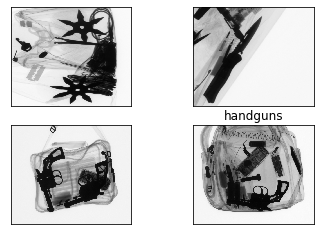

In [0]:
showResults(num=4,class_name="handguns")

## **Download the results**

In [0]:
!zip -r "drive/My Drive/Dataset.zip" "Dataset"

print("Dataset.zip file uploaded on your google drive. Kindly check your google drive")
